In [3]:
#导入第三方库
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
#设置中文编码和负号的正常显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [18]:
df = pd.read_csv('手机销售分布分析.csv')#,encoding='utf8'
df.head()
# 1.创建Python代码，导入数据后展示数据的完整信息（2分）
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          564169 non-null  int64  
 1   start_time  564169 non-null  object 
 2   oid         564169 non-null  float64
 3   pid         564169 non-null  float64
 4   type_id     564169 non-null  float64
 5   type        434799 non-null  object 
 6   brand       536945 non-null  object 
 7   price       564169 non-null  float64
 8   uid         564169 non-null  float64
 9   age         564169 non-null  int64  
 10  sex         564169 non-null  object 
 11  province    564169 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 51.7+ MB


id           oid           pid       type_id          price  \
count  5.641690e+05  5.641690e+05  5.641690e+05  5.641690e+05  564169.000000   
mean   1.792965e+06  2.370552e+18  1.695714e+18  2.274561e+18     208.269324   
std    7.745342e+05  2.025103e+16  3.290675e+17  2.043315e+16     304.559875   
min    0.000000e+00  2.294360e+18  1.515970e+18  2.270000e+18       0.000000   
25%    1.658965e+06  2.353290e+18  1.515970e+18  2.270000e+18      23.130000   
50%    1.861597e+06  2.376890e+18  1.515970e+18  2.270000e+18      87.940000   
75%    2.473370e+06  2.388440e+18  1.515970e+18  2.270000e+18     277.750000   
max    2.633520e+06  2.388440e+18  2.388430e+18  2.370000e+18   18328.680000   

                uid            age  
count  5.641690e+05  564169.000000  
mean   1.520000e+18      33.184388  
std    0.000000e+00      10.122088  
min    1.520000e+18      16.000000  
25%    1.520000e+18      24.000000  
50%    1.520000e+18      33.000000  
75%    1.520000e+18      42.000000  
max    1.520000e+18      50.000000

In [48]:
# 2.完成对数据清洗，根据Start_tim字段新增每月，每日，每周，每小时列，用来对每条记录进行更为细粒度的刻画。(3分)
df['start_time'] = df['start_time'].astype('datetime64')
df['month'] = df['start_time'].dt.month
df['day'] = df['start_time'].dt.day
df['weekday'] = df['start_time'].dt.dayofweek
df['hour'] = df['start_time'].dt.hour

In [4]:
# 3.统计出空值的记录数，将所有为的空字段替换成0（或null），显示出来空字段的个数，并对所有重复的记录去重输出数据（5分）
df.fillna('null',inplace=True)
df.isnull().sum()
df.drop_duplicates(inplace=True)

In [22]:
# 4.根据拿到的数据信息统计出各个省份不同性别的订单总数量，并且使用可视化工具生成各个省份不同性别的消费总数量的折线图（用虚线表示线条），并设置图像标题，图像标签,图像图例，图像的X轴标签，图像的y轴标签。（解决中文乱码问题）并形成分析结论（8分）
result = df.groupby(['province','sex'])['oid'].nunique()

r1 = result.reset_index()

# # 方式一： 分别画出男女折现图
r_m = r1[r1['sex']=='男']
r_m
# r_f = r1[r1['sex']=='女']
# plt.plot(r_m['province'],r_m['oid'])
# plt.plot(r_f['province'],r_f['oid'])
# plt.show()
# # 方式二：将省份 作为 行索引 ，性别（男女）作为列索引 DataFrame
r2 = r1.pivot_table(index='province',columns='sex',values='oid')
r2.plot(linestyle='--')
plt.title('省份性别订单数')
plt.legend()
plt.xlabel('省份')
plt.ylabel('订单数')
plt.show()
# 结论： 不同省份男女消费相当，广东、上海高于其他省份


   province sex   oid
0        上海   女  4280
1        上海   男  4386
2        北京   女  4352
3        北京   男  4370
4        四川   女  2378
5        四川   男  2538
6        天津   女  2471
7        天津   男  2369
8        广东   女  4878
9        广东   男  4916
10       江苏   女  2405
11       江苏   男  2499
12       浙江   女  2331
13       浙江   男  2399
14       海南   女  2409
15       海南   男  2474
16       湖北   女  2432
17       湖北   男  2406
18       湖南   女  2453
19       湖南   男  2452
20       重庆   女  2487
21       重庆   男  2340


In [54]:
# 5.统计每月用户不同喜好的购买数量和总金额，并生成不同品牌的购买数量和总金额的柱形图，柱形图填充颜色为红色，边框颜色为黑色，添加图例（向左偏移），标签（解决中文乱码问题）并形成分析结论（8分）
bdf = df[df['brand'] != 'null']
top5brands = bdf['brand'].value_counts().head(5)
bdf = bdf[bdf['brand'].isin(top5brands.index)]

# top5brands 前5匹配购买数量
# data_sum = bdf.groupby(["brand"])["price"].sum().sort_values(ascending=False)
# data_sum
# df1 = pd.concat([top5brands,data_sum],axis=1)
# df1["price"] = df1["price"]/10000
# df1.plot.bar()


r1 = bdf.groupby(['month'])['brand'].value_counts()
r2 = bdf.groupby(['month','brand'])['price'].sum()
r1.to_frame().rename(columns={'brand':'cnts'}).pivot_table(index='month',columns='brand').plot.bar()
r2.to_frame().pivot_table(index='month',columns='brand').plot.bar()

month  brand  
1      samsung     1793
       tefal        668
       ava          639
       apple        523
       lg           281
2      samsung     1918
       tefal        866
       ava          673
       apple        561
       lg           349
3      samsung     2625
       tefal        827
       ava          639
       apple        540
       lg           429
4      samsung     1568
       apple        598
       ava          517
       lg           293
       tefal        256
5      samsung     7598
       apple       2390
       ava         1806
       lg          1133
       tefal       1113
6      samsung     6526
       ava         2143
       apple       1697
       tefal       1357
       lg          1238
7      samsung    14023
       ava         5454
       apple       4312
       lg          2506
       tefal       1899
8      samsung    21292
       apple       9441
       lg          3837
       ava         3287
       tefal       2125
9      samsung    12509
 

In [62]:
'''
data = {'A': ['foo', 'bar', 'baz', 'foo', 'bar', 'baz'],
        'B': [1, 2, 3, 4, 5, 6],
        'C': [2.0, 3.0, 4.0, 5.0, 6.0, 7.0]}
df = pd.DataFrame(data)
df
topn = 1
result = df.groupby('A').apply(lambda x: x.nlargest(topn, 'C'))

r1top5 = r1.groupby('month').apply(lambda x: x.head(5))
'''

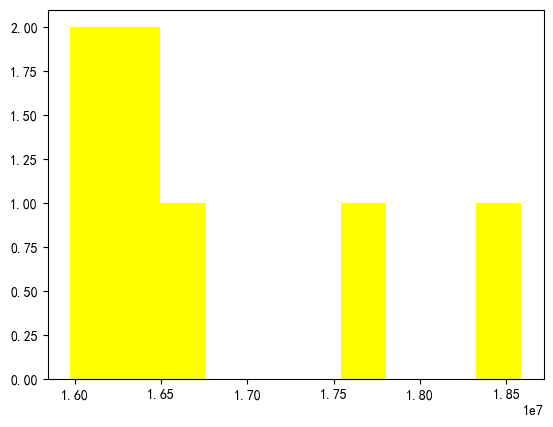

In [53]:
# 6.求出不同星期的客单价，并在界面上使用图像可视化工具生成不同星期的消费情况的直方图，图像填充颜色为黄色，并解释x轴刻度，根据自己对业务指标的分析得出相应的结论，并做出解答。（客单价=总金额/总人数）（解决中文乱码问题）（8分）
sumdf = df.groupby('weekday')['price'].sum()
nuiddf = df.groupby('weekday')['uid'].nunique()
result = sumdf/nuiddf
# result.plot.bar()
# plt.show()
plt.hist(result.values,color='yellow')
plt.show()
# x轴：代表客单价，y轴代表 星期几的个数,例如：客单价为1.6有两天

In [55]:
# 7.使用Matplotlib绘制不同性别在时间维度上，对不同商品品类的支付金额分布，并形成分析结论（8分）
# df['type'].value_counts() 124个品类

'''
tdf = pd.DataFrame([[1,'A',20],[1,'A',50],[1,'B',20],
                    [2,'A',20],[2,'B',70],[2,'B',20]],columns=['month','type','price'])
tr1 = tdf.pivot_table(index='month',columns='type',values='price')
tr1
plt.scatter(x=tr1.index,y=tr1['A'])
plt.scatter(x=tr1.index,y=tr1['B'])
'''
# tdf = df[df['type'] != 'null']

# tr1 = tdf[tdf['sex']=='女']#.groupby(['month','type'])['price'].sum()
# #因为品牌有120多个，挑选5个来展示 accessories.bag apparel.glove apparel.shirt apparel.trousers apparel.tshirt
# tr11 = tr1.reset_index()

# tr11_1 = tr11[tr11['type']=='accessories.bag']
# plt.scatter(tr11_1['month'],tr11_1['price'],label='accessories.bag')
# tr11_2 = tr11[tr11['type']=='apparel.glove']
# plt.scatter(tr11_2['month'],tr11_2['price'],label='apparel.glove')
# tr11_3 = tr11[tr11['type']=='apparel.shirt']
# plt.scatter(tr11_3['month'],tr11_3['price'],label='apparel.shirt')
# tr11_4 = tr11[tr11['type']=='apparel.trousers']
# plt.scatter(tr11_4['month'],tr11_4['price'],label='apparel.trousers')
# tr11_5 = tr11[tr11['type']=='apparel.tshirt']
# plt.scatter(tr11_5['month'],tr11_5['price'],label='apparel.tshirt')
# plt.legend()
# plt.show()
# tr1 = tdf[tdf['sex']=='男']#.groupby(['month','type'])['price'].sum()
# tr11 = tr1.reset_index()
# tr11_1 = tr11[tr11['type']=='accessories.bag']
# plt.scatter(tr11_1['month'],tr11_1['price'],label='accessories.bag')
# tr11_2 = tr11[tr11['type']=='apparel.glove']
# plt.scatter(tr11_2['month'],tr11_2['price'],label='apparel.glove')
# tr11_3 = tr11[tr11['type']=='apparel.shirt']
# plt.scatter(tr11_3['month'],tr11_3['price'],label='apparel.shirt')
# tr11_4 = tr11[tr11['type']=='apparel.trousers']
# plt.scatter(tr11_4['month'],tr11_4['price'],label='apparel.trousers')
# tr11_5 = tr11[tr11['type']=='apparel.tshirt']
# plt.scatter(tr11_5['month'],tr11_5['price'],label='apparel.tshirt')
# plt.legend()
# plt.show()



index       id          start_time           oid           pid  \
0            0        0 2020-04-24 11:50:39  2.294360e+18  1.515970e+18   
1            1        1 2020-04-24 11:50:39  2.294360e+18  1.515970e+18   
2            2        2 2020-04-24 14:37:43  2.294440e+18  2.273950e+18   
3            3        3 2020-04-24 14:37:43  2.294440e+18  2.273950e+18   
4            4        4 2020-04-24 19:16:21  2.294580e+18  2.273950e+18   
...        ...      ...                 ...           ...           ...   
279743  564163  2633515 2020-11-21 10:08:54  2.388440e+18  1.515970e+18   
279744  564165  2633517 2020-11-21 10:10:13  2.388440e+18  1.515970e+18   
279745  564166  2633518 2020-11-21 10:10:30  2.388440e+18  1.515970e+18   
279746  564167  2633519 2020-11-21 10:10:30  2.388440e+18  2.273950e+18   
279747  564168  2633520 2020-11-21 10:10:30  2.388440e+18  1.515970e+18   

             type_id                         type     brand   price  \
0       2.270000e+18           electronics.tablet   samsung  162.01   
1       2.270000e+18           electronics.tablet   samsung  162.01   
2       2.270000e+18  electronics.audio.headphone    huawei   77.52   
3       2.270000e+18  electronics.audio.headphone    huawei   77.52   
4       2.270000e+18                          NaN   karcher  217.57   
...              ...                          ...       ...     ...   
279743  2.370000e+18         electronics.video.tv        lg  370.35   
279744  2.270000e+18       electronics.smartphone     apple  418.96   
279745  2.270000e+18   appliances.personal.scales     vitek   12.48   
279746  2.270000e+18                          NaN  moulinex   41.64   
279747  2.270000e+18   appliances.kitchen.blender   redmond   53.22   

                 uid  age sex province  month  day  weekday  hour  
0       1.520000e+18   24   女       海南      4   24        4    11  
1       1.520000e+18   24   女       海南      4   24        4    11  
2       1.520000e+18   38   女       北京      4   24        4    14  
3       1.520000e+18   38   女       北京      4   24        4    14  
4       1.520000e+18   32   女       广东      4   24        4    19  
...              ...  ...  ..      ...    ...  ...      ...   ...  
279743  1.520000e+18   25   女       上海     11   21        5    10  
279744  1.520000e+18   21   女       北京     11   21        5    10  
279745  1.520000e+18   19   女       上海     11   21        5    10  
279746  1.520000e+18   19   女       上海     11   21        5    10  
279747  1.520000e+18   19   女       上海     11   21        5    10  

[279748 rows x 17 columns]

([<matplotlib.patches.Wedge at 0x19c057c1400>,
 [Text(-0.014311625718497095, 1.099906894863967, '男'),
  Text(0.01431172869921248, -1.099906893524011, '女')],
 [Text(-0.010408455067997887, 0.7999322871737942, '50.4%'),
  Text(0.010408529963063622, -0.7999322861992808, '49.6%')])

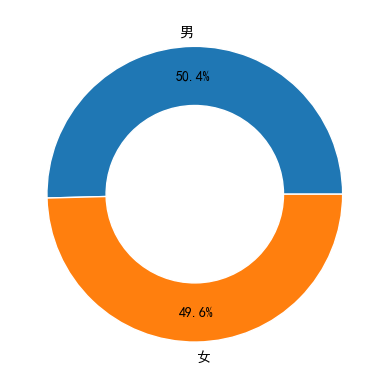

In [62]:
# tr1 = tr1.head(20)
# x = tr1['month'].values
# y = tr1['type'].values #[a, b ,b ,b, c,d]
# z = tr1['price'].values
#
# y1 = tr1['type'].drop_duplicates()
# print(y1)
# y11 = y1.reset_index()
# yy = []
# for i in y:
#     yy.append(y11[y11['type']==i].index[0])
#
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111,projection='3d')
# ax.scatter(x,yy,z)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# print(y11.index)
# ax.set_yticklabels(y1.values)

data = df["sex"].value_counts()
# data.plot.pie()
# 饼图
c, v = data.index, data.values
plt.pie(
    x=v,  # 值
    autopct='%.1f%%',  # 百分比
    labels=c,  # 标签
    pctdistance=0.8,  # 百分比文字的位置
    # 字体样式
    textprops={'fontsize': 10, 'color': 'k'},
    # 甜甜圈设置
    wedgeprops={'width': 0.4, 'edgecolor': 'w'}
)

In [78]:
# 8.使用Matplotlib绘制不同城市不同人群在商品品类的渗透率(渗透率=该城市该人群购物总额/商品总付款额)，并形成分析结论（8分）
#不同城市，不同品类消费金额
sprice = df.groupby(['province','type'])['price'].sum()
#男的不同城市，不同品类消费金额
mprice = df[df['sex']=='男'].groupby(['province','type'])['price'].sum()
#女的不同城市，不同品类消费金额
fprice = df[df['sex']=='女'].groupby(['province','type'])['price'].sum()

In [82]:
#
mdf = mprice/sprice

mdf = mdf.reset_index()
mdf
# #因为品牌有120多个，挑选5个来展示 accessories.bag apparel.glove apparel.shirt apparel.trousers apparel.tshirt
mdf_1 = mdf[mdf['type']=='accessories.bag']
mdf_2 = mdf[mdf['type']=='apparel.glove']
mdf_3 = mdf[mdf['type']=='apparel.shirt']
mdf_4 = mdf[mdf['type']=='apparel.trousers']
mdf_5 = mdf[mdf['type']=='apparel.tshirt']
plt.plot(mdf_1['province'],mdf_1['price'],label='accessories.bag')
plt.plot(mdf_2['province'],mdf_2['price'],label='apparel.glove')
plt.plot(mdf_3['province'],mdf_3['price'],label='apparel.shirt')
plt.plot(mdf_4['province'],mdf_4['price'],label='apparel.trousers')
plt.plot(mdf_5['province'],mdf_5['price'],label='apparel.tshirt')
plt.legend()
plt.show()

province                  type     price
0          上海       accessories.bag  0.514842
1          上海  accessories.umbrella  0.536040
2          上海         apparel.glove  0.408931
3          上海         apparel.shirt  0.650003
4          上海         apparel.shoes       NaN
...       ...                   ...       ...
1251       重庆         sport.trainer  0.727294
1252       重庆    stationery.battery  0.347781
1253       重庆   stationery.cartrige  0.661281
1254       重庆      stationery.paper  0.433520
1255       重庆    stationery.stapler  0.218832

[1256 rows x 3 columns]

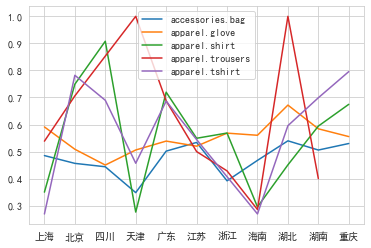

In [17]:
mdf = fprice/sprice
mdf = mdf.reset_index()
#因为品牌有120多个，挑选5个来展示 accessories.bag apparel.glove apparel.shirt apparel.trousers apparel.tshirt
mdf_1 = mdf[mdf['type']=='accessories.bag']
mdf_2 = mdf[mdf['type']=='apparel.glove']
mdf_3 = mdf[mdf['type']=='apparel.shirt']
mdf_4 = mdf[mdf['type']=='apparel.trousers']
mdf_5 = mdf[mdf['type']=='apparel.tshirt']
plt.plot(mdf_1['province'],mdf_1['price'],label='accessories.bag')
plt.plot(mdf_2['province'],mdf_2['price'],label='apparel.glove')
plt.plot(mdf_3['province'],mdf_3['price'],label='apparel.shirt')
plt.plot(mdf_4['province'],mdf_4['price'],label='apparel.trousers')
plt.plot(mdf_5['province'],mdf_5['price'],label='apparel.tshirt')
plt.legend()
plt.show()

<AxesSubplot:xlabel='sex'>

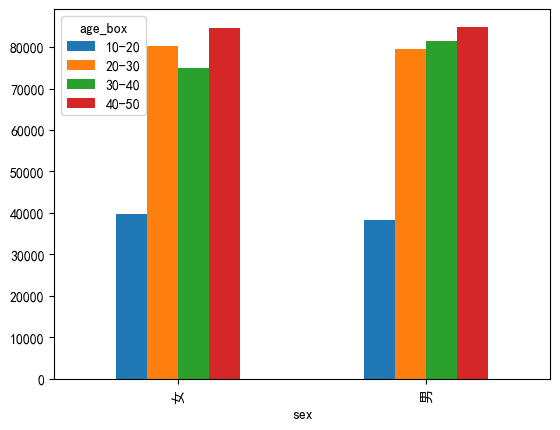

In [74]:
# 8 年龄段男女分配情况

bins=[10,20,30,40,50]
df['age_box'] = pd.cut(df['age'],bins,labels=['10-20','20-30','30-40','40-50'])
data = df.groupby(["sex","age_box"])["id"].count()
data = data.unstack()
data.plot.bar()

In [87]:
# 计算相关性矩阵
corr_matrix = df.corrwith(df["price"])
# 显示相关性矩阵
print(corr_matrix)

id         0.058477
oid        0.052409
pid       -0.056155
type_id    0.126777
price      1.000000
uid             NaN
age       -0.003692
month      0.049218
day        0.016355
weekday   -0.006717
hour       0.036420
dtype: float64


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# 假设'target'是我们要预测的列（例如：用户是否下单）
X = df[["age","month"]] # 特征
y = df['price']  # 目标变量

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# # 创建模型实例
# logreg = LogisticRegression()
# # 训练模型
# logreg.fit(X_train, y_train)